In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 30

In [4]:
dataset = keras.preprocessing.image_dataset_from_directory(
    'images',
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    shuffle = True
)

Found 363 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

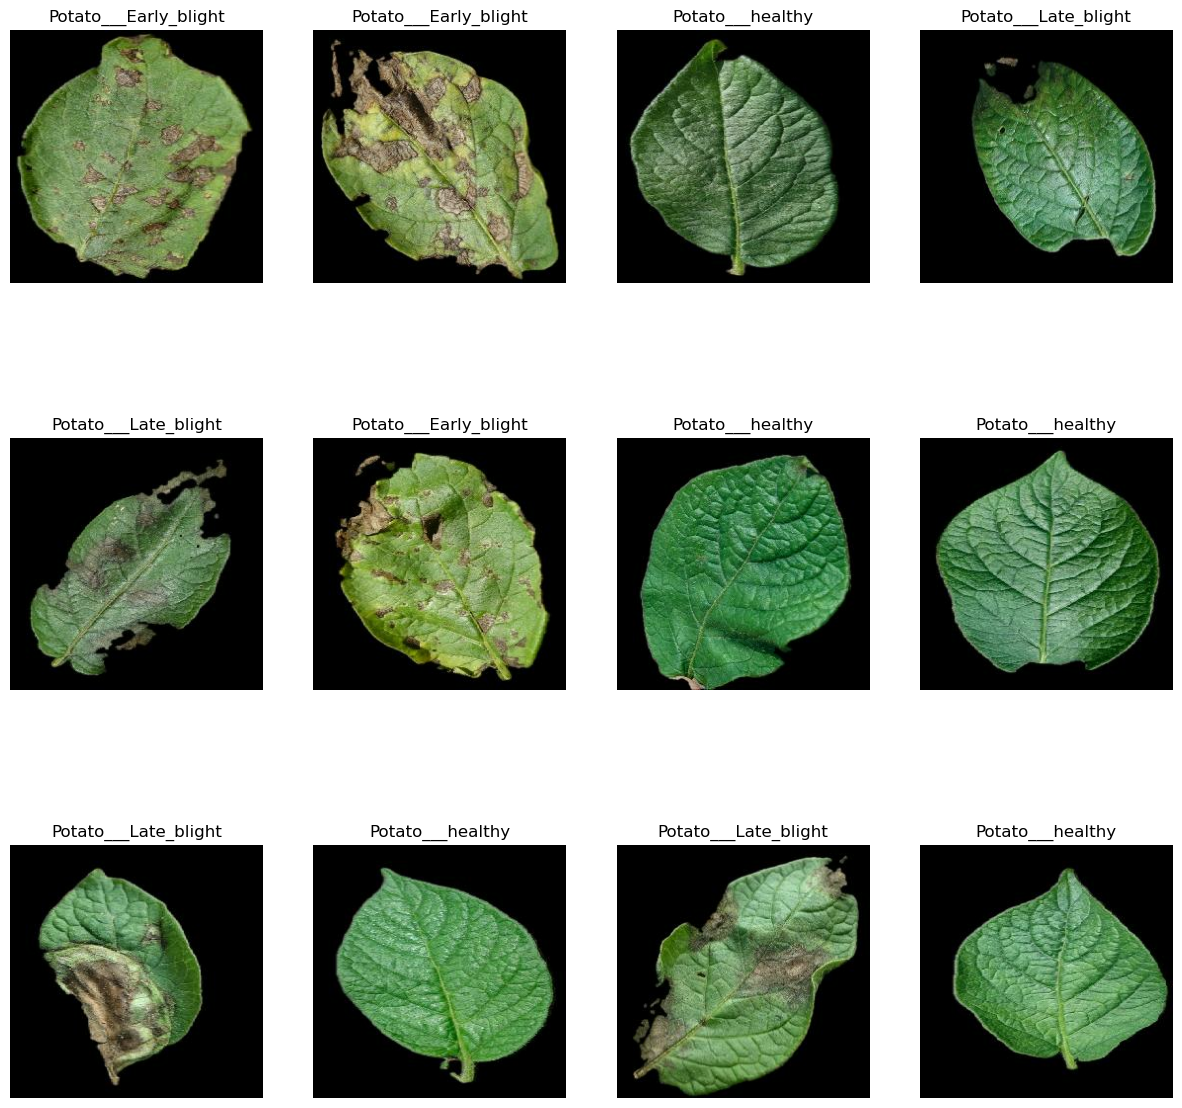

In [20]:
plt.figure(figsize=(15,15))
for image_label, batch_label in dataset.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(image_label[i].numpy().astype('uint8'))
        plt.title(class_names[batch_label[i].numpy()])
        plt.axis('off')

In [21]:
#split out dataset, cache_and_pre, resizign, rescaling, data augmentation conv2d layer, dense, compile, fit , evaluater. preidt

len(dataset)

12

In [23]:
train_ds = dataset.take(9)
len(train_ds)

9

In [31]:
test_ds = dataset.skip(9)
val_ds = test_ds.take(1)

In [32]:
len(val_ds)

1

In [34]:
test_ds = test_ds.skip(1)

In [35]:
len(test_ds)

2

In [38]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

9
1
2


In [39]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [42]:
resize_and_rescale = keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [43]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [50]:
#sequential api --- Cnn

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(input_shape)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
    
])

model.build(input_shape = input_shape)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_3 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                 

In [51]:
model.compile(
        
        optimizer= keras.optimizers.Adam(learning_rate=0.001),
        loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics = ['accuracy']
)

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
model.fit(
    train_ds, 
    batch_size = BATCH_SIZE,
    shuffle=True,
    validation_data= val_ds,
    epochs = EPOCHS
)

Epoch 1/30
9/9 [==============================] - 25s 3s/step - loss: 0.2119 - accuracy: 0.9201 - val_loss: 0.2014 - val_accuracy: 0.9375
Epoch 2/30
9/9 [==============================] - 29s 3s/step - loss: 0.1685 - accuracy: 0.9479 - val_loss: 0.0881 - val_accuracy: 0.9688
Epoch 3/30
9/9 [==============================] - 31s 3s/step - loss: 0.2108 - accuracy: 0.9132 - val_loss: 0.1578 - val_accuracy: 0.9375
Epoch 4/30
9/9 [==============================] - 10834s 4s/step - loss: 0.2166 - accuracy: 0.9167 - val_loss: 0.1041 - val_accuracy: 0.9688
Epoch 5/30
9/9 [==============================] - 29266s 3s/step - loss: 0.1983 - accuracy: 0.9306 - val_loss: 0.0754 - val_accuracy: 0.9375
Epoch 6/30
9/9 [==============================] - 27s 3s/step - loss: 0.1933 - accuracy: 0.9236 - val_loss: 0.1028 - val_accuracy: 0.9375
Epoch 7/30
9/9 [==============================] - 32s 4s/step - loss: 0.1587 - accuracy: 0.9340 - val_loss: 0.0419 - val_accuracy: 1.0000
Epoch 8/30
9/9 [============